# Polynomial regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hyperparameters

In [2]:
POLYNOMIAL_DEGREE = 3

## Initiate data

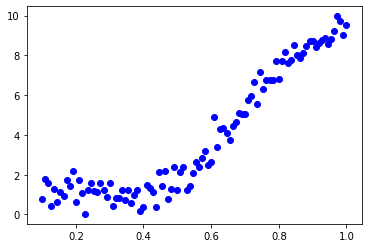

In [3]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(X) + 0.1*np.power(X,2) + 0.5*np.random.randn(100,1)
X /= np.max(X)

plt.plot(X, y, 'bo')

## Split data to train and test

In [4]:
order = np.random.permutation(len(X))
portion = 20
test_x = X[order[:portion]]
test_y = y[order[:portion]]
train_x = X[order[portion:]]
train_y = y[order[portion:]]

## Fit model using train data

In [5]:
class PolynomialRegression():

    
    def __init__(self, regularization = 0.01, learning_rate = 0.5, tolerance = 1e-5, polynomial_degree = 3):
        self.regularization = regularization
        self.lr = learning_rate
        self.tolerance = tolerance
        self.polynomial_degree = polynomial_degree + 1
        self.w = np.random.randn(polynomial_degree + 1)
    
    def _get_gradient(self, w, x, y):
        y_estimate = x@w
        error = y.flatten() - y_estimate
        gradient = -(1.0 / len(x)) * error @ x + self.regularization * w
        return gradient, error@error
    
    def _extend_data(self, train_x):
        x_data = np.ones_like(train_x)

        for i in range(1, self.polynomial_degree):
            x_data = np.hstack((x_data, train_x**i))

        return x_data

    def fit(self, X, y, degree = 1, verbose = False):
        iterations = 1

        while True:
            x_data = self._extend_data(train_x)
            y_data = train_y

            gradient, error = self._get_gradient(self.w, x_data, train_y)
            new_w = self.w - self.lr * gradient

            if np.sum(abs(new_w - self.w)) < self.tolerance:
                break

            if verbose and iterations % 10 == 0:
                print("Iteration: %d - Error: %.4f" %(iterations, error))

            iterations += 1
            self.w = new_w
        
        return self
            
    def predict(self, X):
        return self._extend_data(X)@self.w

In [6]:
model = PolynomialRegression()
model.fit(train_x, train_y, degree=POLYNOMIAL_DEGREE, verbose=True)

Iteration: 10 - Error: 163.6813
Iteration: 20 - Error: 83.4147
Iteration: 30 - Error: 63.3894
Iteration: 40 - Error: 57.6326
Iteration: 50 - Error: 55.6160
Iteration: 60 - Error: 54.7318
Iteration: 70 - Error: 54.2511
Iteration: 80 - Error: 53.9371
Iteration: 90 - Error: 53.7012
Iteration: 100 - Error: 53.5068
Iteration: 110 - Error: 53.3372
Iteration: 120 - Error: 53.1847
Iteration: 130 - Error: 53.0452
Iteration: 140 - Error: 52.9165
Iteration: 150 - Error: 52.7974
Iteration: 160 - Error: 52.6867
Iteration: 170 - Error: 52.5837
Iteration: 180 - Error: 52.4879
Iteration: 190 - Error: 52.3986
Iteration: 200 - Error: 52.3154
Iteration: 210 - Error: 52.2379
Iteration: 220 - Error: 52.1655
Iteration: 230 - Error: 52.0980
Iteration: 240 - Error: 52.0351
Iteration: 250 - Error: 51.9763
Iteration: 260 - Error: 51.9214
Iteration: 270 - Error: 51.8702
Iteration: 280 - Error: 51.8223
Iteration: 290 - Error: 51.7776
Iteration: 300 - Error: 51.7357
Iteration: 310 - Error: 51.6967
Iteration: 320 -

## Test using test data

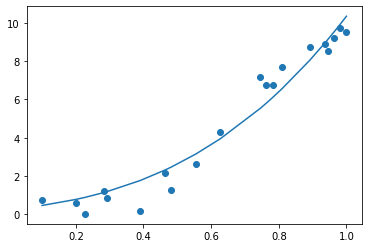

In [7]:
plt.plot(np.sort(test_x.flatten()), np.sort(model.predict(test_x)))
plt.scatter(test_x, test_y)